# Introduction

<img src= "https://i0.wp.com/post.healthline.com/wp-content/uploads/2021/11/1672630-Everything-You-Need-to-Know-About-Stroke_1296x1059-1.jpg?w=1155&h=2223" width="450" height="450" align="center">

<span style="font-family: Consolas;"> A stroke occurs when a blood vessel in the brain ruptures and bleeds, or when there's a blockage in the blood supply to the brain. The rupture or blockage prevents blood and oxygen from reaching the brain's tissues.</span>

<span style="font-family: Consolas;"><br>Every 4 minutes, someone dies of stroke. Every year, more than 795,000 people in the United States alone have a stroke. About 610,000 of these are first or new strokes. About 185,000 strokes—nearly 1 of 4—are in people who have had a previous stroke.<br> According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.</span>



#### Importing libraries and dataset

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

#### Composition of the dataset 

In [5]:
df.shape

(5110, 12)

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Let us understand each attribute a bit closely:


- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not


In [9]:
df.columns=df.columns.str.lower()

#### Null Values Handling 

In [10]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df=df.fillna(np.mean(df['bmi']))
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Although there are no missing values in the dataset anymore, it is important to note at this point that the column 'smoking_status' contains values "Unknown" which means that the information is unavailable for this patient.

In [12]:
df['smoking_status'].replace('Unknown', df['smoking_status'].mode()[0], inplace=True)

Since we do not need the 'id' column, we will drop the column from our dataset.

In [13]:
df.drop('id', axis=1, inplace=True)

In [14]:
df = df[df['gender'] != 'Other']

Let us segregate the data into numerical and categorical values.

>Categorical data refers to a data type that can be stored and identified based on the names or labels given to them. 

>Numerical data refers to the data that is in the form of numbers, and not in any language or descriptive form. 

This will help us analyze the data better.

In [15]:
numeric_data=df.loc[:,df.nunique() > 5]
cols = [col for col in df.columns if col not in numeric_data]

categorical_data=df[cols].drop('stroke',axis=1)
numeric_data=pd.DataFrame(numeric_data)
categorical_data=pd.DataFrame(categorical_data)

In [16]:
print(f'Numerical data: {list(numeric_data)}')
print(f'Categorical data: {list(categorical_data)}')

Numerical data: ['age', 'avg_glucose_level', 'bmi']
Categorical data: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']


# EDA

#### Heatmap

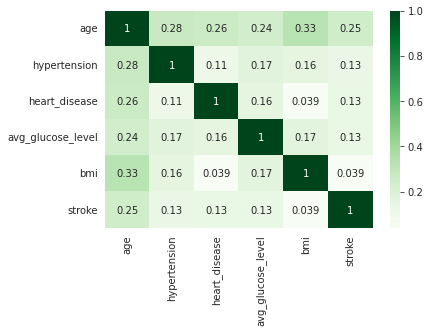

In [17]:
sns.heatmap(df.corr(), cmap = 'Greens',annot=True);

As visible from the heatmap:
- 'age' and 'bmi' are correlated fairly high. This shows that the bmi tends to increase with an increase in age.
-  'age' and 'hypertension' are also quite correlated. This is alarming for our society, as this implies poorer mental health conditions among elders.

### Countplot

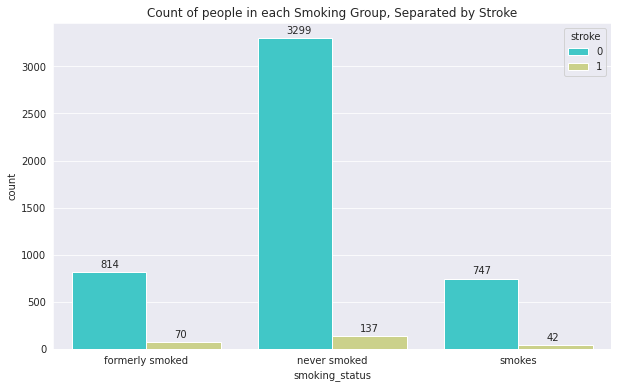

In [18]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='smoking_status',data=df, palette='rainbow',hue='stroke')
plt.title("Count of people in each Smoking Group, Separated by Stroke")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))

- People who formerly smoked and who smoke show signs of stroke way more than people who never smoked.

### Catplot

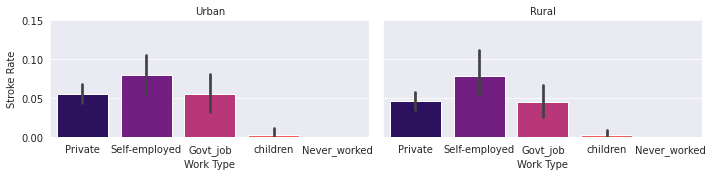

In [19]:
g = sns.catplot(x='work_type',y='stroke', col = 'residence_type', data=df, kind='bar', palette='magma', saturation =2.5)
(g.set_axis_labels("Work Type", "Stroke Rate").set_titles("{col_name}").set(ylim=(0,0.15)))
g.fig.set_figwidth(10)
g.fig.set_figheight(2)


As visible from the above:
- Living in a rural or urban areas does not affect the risk of stroke in any way.

# Preprocessing

#### Standard Scaler

This arranges the data in a standard normal distribution, with mean as 0 and standard deviation as 1.

In [20]:
num_cols=numeric_data.columns.to_list()
sc = StandardScaler()
df[num_cols] = sc.fit_transform(df[num_cols])

In [21]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.051242,0,1,Yes,Private,Urban,2.706450,1.001041,formerly smoked,1
1,Female,0.785889,0,0,Yes,Self-employed,Rural,2.121652,-0.000165,never smoked,1
2,Male,1.626174,0,1,Yes,Private,Rural,-0.004867,0.468399,never smoked,1
3,Female,0.255182,0,0,Yes,Private,Urban,1.437473,0.715233,smokes,1
4,Female,1.581949,1,0,Yes,Self-employed,Rural,1.501297,-0.635858,never smoked,1


#### Label Encoding

Converting the labels into a numeric form so as to use it to fit and evaluate a model.

In [22]:
le = LabelEncoder()
object_col = [col for col in df.columns if df[col].dtype == 'object']
for col in object_col:
    df[col] = le.fit_transform(df[col])

In [23]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051242,0,1,1,2,1,2.706450,1.001041,0,1
1,0,0.785889,0,0,1,3,0,2.121652,-0.000165,1,1
2,1,1.626174,0,1,1,2,0,-0.004867,0.468399,1,1
3,0,0.255182,0,0,1,2,1,1.437473,0.715233,2,1
4,0,1.581949,1,0,1,3,0,1.501297,-0.635858,1,1


#### Oversampling

> **SMOTE - Synthetic Minority Oversampling Technique** is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [24]:
training_data=df.copy()
x= training_data.drop(['stroke'],axis=1)
y= df['stroke']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train,y_train)

# Modelling

In [26]:
lr= LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(lr_pred, y_test)
lr_f1 = f1_score(lr_pred, y_test)
lr_acc

0.7504892367906066

In [27]:
decision_tree = DecisionTreeClassifier()   
decision_tree.fit(x_train,y_train)
dt_pred = decision_tree.predict(x_test)
dt_acc = accuracy_score(dt_pred, y_test)
dt_acc

0.8444227005870841

In [28]:
rf = RandomForestClassifier(n_estimators = 25)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_acc = accuracy_score(rf_pred, y_test)
rf_acc

0.8620352250489237

In [29]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_acc = accuracy_score(xgb_pred, y_test)
xgb_acc

0.7818003913894325

In [30]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(knn_pred, y_test)
knn_acc

0.7759295499021527

In [31]:
lgbm = LGBMClassifier(random_state = 42)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
lgbm_acc = accuracy_score(lgbm_pred, y_test)
lgbm_acc

0.8894324853228963

In [32]:
svm=SVC(random_state=42)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_acc = accuracy_score(svm_pred, y_test)
svm_acc

0.7544031311154599

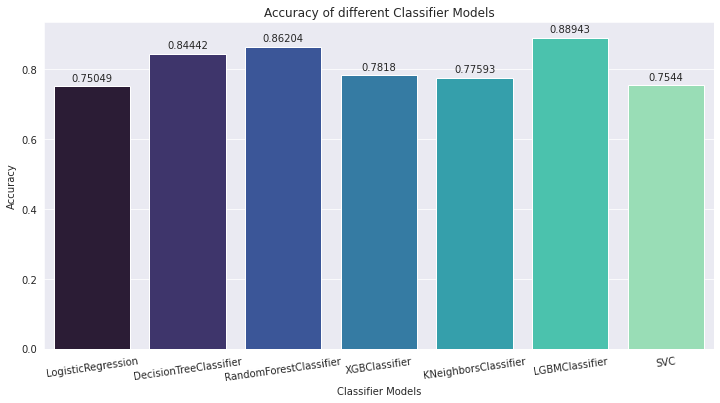

In [33]:
models_names = ["LogisticRegression",'DecisionTreeClassifier','RandomForestClassifier','XGBClassifier',
                    'KNeighborsClassifier','LGBMClassifier','SVC']
models_acc=[lr_acc,dt_acc,rf_acc,xgb_acc,knn_acc,lgbm_acc,svm_acc]

plt.rcParams['figure.figsize']=12,6
ax = sns.barplot(x=models_names, y=models_acc, palette = "mako", saturation =1.5)
plt.xlabel('Classifier Models' )
plt.ylabel('Accuracy')
plt.title('Accuracy of different Classifier Models')
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 10)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,5)}', (x + width/2, y + height*1.02), ha='center', fontsize = 10)
plt.show()

# Model Tuning

Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. Here we apply model tuning only to XGB  classifier, as it has the highest accuracy so far.

In [47]:
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=1,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 10,
    verbose=3
)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10, estimator=XGBClassifier(nthread=1, seed=42), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=3)

In [49]:
grid_search.best_estimator_

XGBClassifier(max_depth=9, n_estimators=180, nthread=1, seed=42)

In [50]:
grid_search.best_score_

0.9943865877712031

Using this tuned classifier:

In [59]:
xgb_tuned=XGBClassifier(colsample_bynode=1, enable_categorical=False,
              gamma=0, importance_type=None, gpu_id=1,
              interaction_constraints='', max_depth=9,
              n_estimators=160, n_jobs=1, nthread=1,
              num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.2, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=1)

xgb_tuned.fit(x_train, y_train)
xgb_tpred = xgb_tuned.predict(x_test)
xgb_tacc = accuracy_score(xgb_tpred, y_test)
xgb_tacc

0.9344422700587084

#### Model Evaluation:

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve, auc,classification_report
cm = confusion_matrix(y_test, xgb_tpred)
xgb_tprob = xgb_tuned.predict_proba(x_test)[:,1]
print(classification_report(y_test, xgb_tpred))
print('ROC AUC score: ',roc_auc_score(y_test, xgb_tprob))
print('Accuracy Score: ',accuracy_score(y_test, xgb_tpred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.22      0.03      0.06        62

    accuracy                           0.93      1022
   macro avg       0.58      0.51      0.51      1022
weighted avg       0.90      0.93      0.91      1022

ROC AUC score:  0.7690692204301075
Accuracy Score:  0.9344422700587084


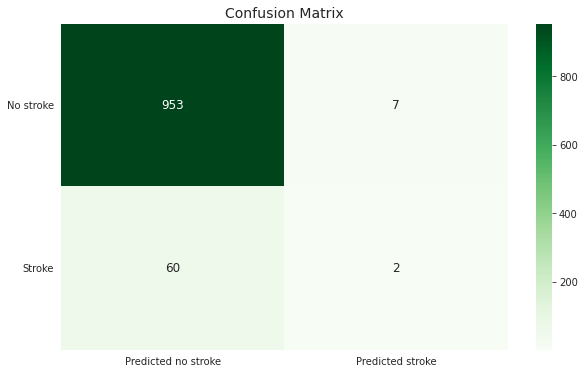

In [61]:
plt.figure(figsize = (10, 6))
plt.title('Confusion Matrix', fontsize=14)
sns.heatmap(cm, cmap = 'Greens', fmt = 'd',annot = True,annot_kws = {'fontsize': 12}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

Here we have completed modelling as well as tuning. The accuracy obtained is 93.4 %.